# Markov Process / Markov Chain
- S: state space
- S[t]: state at t
- s0: initial state
- H[t] = {S[0],S[1],S[2]....S[t]}: History of state at t
- P: state transition probability matrix (constant)
- P[s,s']: Probability of going from s to s'
- T: periods under simulation

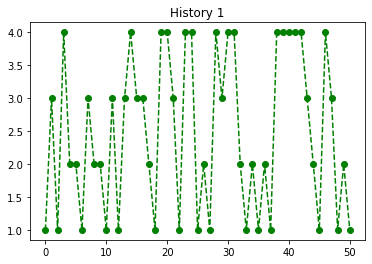

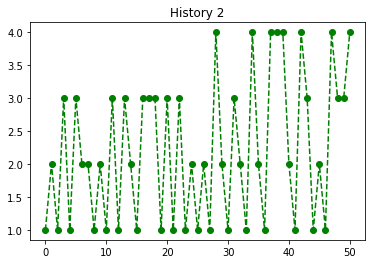

In [1]:
import matplotlib.pyplot as plt
import numpy as np

S = [1, 2, 3, 4] # state space
P = [[0, 0.2, 0.4, 0.4],  # transition matrix
     [0.9, 0.1, 0, 0], 
     [0.5, 0.2, 0.2, 0.1],
     [0.1, 0.2, 0.3, 0.4]]

s0 = 1 # initial state value
T = 50 # simulation periods

# Arrays
S = np.array(S)
P = np.array(P)
H = np.empty(T+1)
H[0] = s0    

# Simulations
for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
plt.plot(H, 'go--')
plt.title('History 1')
plt.show()

for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
plt.plot(H, 'go--')
plt.title('History 2')
plt.show()

# Markov Reward Process
- RS: Reward Space
- R[t]: Instantanous Reward in period t, from S[t]
- d: Discounting parameter
- G: Return is the discounted sum of rewards of one sequence from t to termination

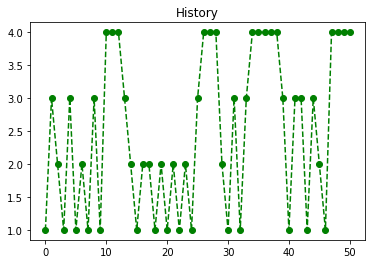

NameError: name 'd' is not defined

In [2]:
RS = [0, 1, 2, 3] # reward for each state
R = np.empty(T)

for t in range(T):
    H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
    R[t] = RS[np.where(S == H[t])[0][0]]
plt.plot(H, 'go--')
plt.title('History')
plt.show()

def discountedSum(R, d):
    sum = 0
    for i, r in enumerate(R):
        sum += R[i] * d ** i
    return sum
G = discountedSum(R, d)
print('G for H[t]', G)

plt.plot(R, 'go--')
plt.title('Rewards')
plt.show()

- V[s] = E[G|s0=s] : Measurement of Expected Return from state s, as it goes to termination
- For each s in S, we simulate 5000 realisations with s0 = s, collect G, and average to get V[s]

In [ ]:
V = np.empty(S.shape[0])
for i, s0 in enumerate(S):
    H = np.empty(T+1)
    H[0] = s0 
    N = 5000
    for ix in range(N):
        avgG = 0
        for t in range(T):
            H[t+1] = np.random.choice(S, p = P[np.where(S == H[t])][0])
            R[t] = RS[np.where(S == H[t])[0][0]]
        G = discountedSum(R, d)
        avgG += G/N
    V[i] = avgG
    
plt.scatter(S, V)
plt.title('V[s] vs s (Monte Carlo)')
plt.show()

- Matrix form: V = (I-d*P)^-1 * R

In [ ]:
V = np.dot(np.linalg.inv(np.eye(P.shape[0]) - d * P), RS)
plt.scatter(S, V)
plt.title('V[s] vs s (Analytical)')
plt.show()

# Markov Decision Process
- AS is action space
- A[t] is action at t
- pi is policy
- 

{PI}